In [1]:
import pandas as pd

In [2]:
housing_data = pd.read_csv("data/housing.csv")

In [3]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In this analysis we want to create a regression model for predicting housing prices (column ``median_house_value``)

In [4]:
housing_data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [5]:
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
pd.get_dummies(housing_data["total_bedrooms"].astype('str'), prefix="a")

,a_1.0,a_10.0,a_100.0,a_1000.0,a_1001.0,a_1002.0,a_1003.0,a_1004.0,a_1005.0,a_1006.0,...,a_991.0,a_992.0,a_993.0,a_994.0,a_995.0,a_996.0,a_997.0,a_998.0,a_999.0,a_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
housing_data["population"].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

In [18]:
strings = list(housing_data.dtypes[housing_data.dtypes == "object"].index)

for col in strings:
	housing_data[col] = housing_data[col].str.lower().str.replace(' ', '_')

In [19]:
for col in housing_data.columns:
	print(col)
	print(housing_data[col].unique()[:5])
	print(housing_data[col].nunique())
	print()

longitude
[-122.23 -122.22 -122.24 -122.25 -122.26]
844

latitude
[37.88 37.86 37.85 37.84 37.83]
862

housing_median_age
[41. 21. 52. 42. 50.]
52

total_rooms
[ 880. 7099. 1467. 1274. 1627.]
5926

total_bedrooms
[ 129. 1106.  190.  235.  280.]
1923

population
[ 322. 2401.  496.  558.  565.]
3888

households
[ 126. 1138.  177.  219.  259.]
1815

median_income
[8.3252 8.3014 7.2574 5.6431 3.8462]
12928

median_house_value
[452600. 358500. 352100. 341300. 342200.]
3842

ocean_proximity
['near_bay' '<1h_ocean' 'inland' 'near_ocean' 'island']
5



<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

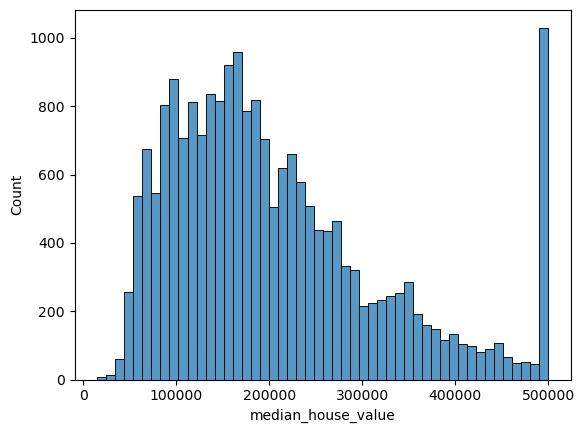

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(housing_data.median_house_value, bins=50)
#sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [9]:
n = len(housing_data)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train, n

# remove target variable


(4128, 4128, 12384, 20640)

In [79]:
import numpy as np
n = len(housing_data)
idx =np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = housing_data.iloc[idx[:n_train]]
df_val = housing_data.iloc[idx[n_train:n_train+n_val]]
df_test = housing_data.iloc[idx[n_train+n_val:]]

In [80]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [81]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [82]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [83]:
def train_linear_regression(X, y):
	ones = np.ones(X.shape[0])
	X = np.column_stack([ones, X])
	
	XTX = X.T.dot(X)
	XTX_inv = np.linalg.inv(XTX)
	w_full = XTX_inv.dot(X.T).dot(y)
	return w_full[0], w_full[1:]

In [84]:
df_train.columns
base = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

In [85]:
def prepare_X(df, method):
    df_num = df[base]
    df_num = df_num.fillna(method)
    X = df_num.values
    return X

In [86]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()

    return np.sqrt(mse)

In [90]:
# training
X_train = prepare_X(df_train, 0)
w0, w = train_linear_regression(X_train, y_train)

# validate
X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.3295330365229457

In [91]:
# training
mean_fill = df_train['total_bedrooms'].mean()

X_train = prepare_X(df_train, mean_fill)
w0, w = train_linear_regression(X_train, y_train)

# validate
X_val = prepare_X(df_val, mean_fill)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.3290195439004843

<AxesSubplot:ylabel='Count'>

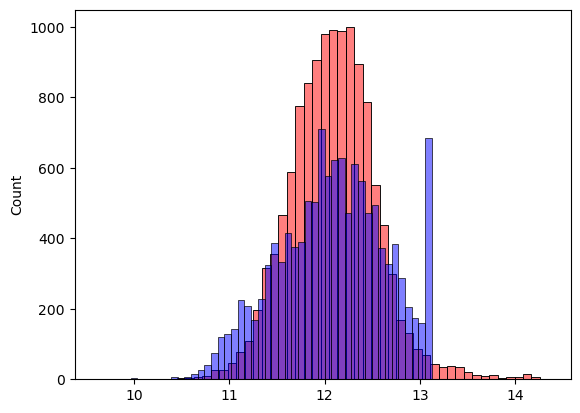

In [60]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins=50)
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins = 50)

## RMSE

0.3413135910156675